<a href="https://colab.research.google.com/github/ubsuny/PHY386/blob/Homework2025/2025/HW/dnxjay/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Part 1: Experimental Setup with phyphox

### **Objective**
In this section, we designed and conducted an experiment to collect acceleration data using a smartphone's 3-axis accelerometer via the Phyphox app. The goal was to record and analyze free-fall motion, capturing the changes in acceleration and impact forces.

---

### **Experimental Procedure**
1. **Experiment Choice**: I selected a free-fall (drop test) experiment to measure the acceleration during a short-duration fall and impact.
2. **Safety Precautions:** To avoid damage to the phone, I ensured:
   - A **cushioned landing surface** (e.g., soft padding or foam).
   - The phone was securely placed in a protective case.
   - The drop height was selected to allow clear data collection without excessive risk.
3. **Phyphox Configuration:**
   - Opened the Phyphox app and selected "Acceleration without g" (which removes Earth’s gravity from the readings).
   - Set the sampling rate to ≥100 Hz for high-resolution data collection.
   - Placed the phone flat or edge-down for consistent readings.
   - Started data collection before dropping the phone to ensure capturing the entire motion.
4. **Data Collection:**
   - The phone was dropped from a fixed height (~1-2 meters).
   - After impact, data recording was stopped and exported as a CSV file.

---

### **Data Export and Storage**
- The recorded acceleration data was exported as `Raw Data.csv` from the Phyphox app.
- The file includes:
  - **Time (s)** – Timestamp of each recorded measurement.
  - **Linear Acceleration (x, y, z) (m/s²)** – Acceleration components along each axis.
  - **Absolute Acceleration (m/s²)** – The total acceleration magnitude.

The data file was uploaded to GitHub inside a newly created directory for better organization.

---

##Part 2: Data Analysis with pandas and NumPy

In [13]:
import pandas as pd
from google.colab import files

def upload_csv():
    """Prompts the user to upload a CSV file in Google Colab and returns the filename."""
    print("Upload your CSV file...")
    uploaded = files.upload()
    return list(uploaded.keys())[0]  # Get the dynamically uploaded filename

def load_dataset(filename):
    """Reads a CSV file into a pandas DataFrame and returns it."""
    return pd.read_csv(filename)

def detect_free_fall(df):
    """
    Identifies the start and impact indexes of a free-fall event based on acceleration values.

    Returns:
        tuple: Indices of free-fall start and impact.
    """
    start_index = df[df["Linear Acceleration z (m/s^2)"] < -1.0].index[0]
    impact_index = df[df["Absolute acceleration (m/s^2)"] > 20].index[0]
    return start_index, impact_index

def clean_dataset(df, start_index, impact_index):
    """Trims the dataset to keep only the free-fall period and resets the index."""
    return df.loc[start_index:impact_index].reset_index(drop=True)

def save_cleaned_data(df_trimmed, filename="cleaned_data.csv"):
    """Saves the cleaned dataset to a CSV file."""
    df_trimmed.to_csv(filename, index=False)
    return filename

# Step 1: Upload and load dataset
filename = upload_csv()
df = load_dataset(filename)

# Step 2: Display the first few rows to check data format
print("\nOriginal Dataset:")
display(df.head())  # Display in Pandas style

# Step 3: Detect free-fall start and impact
start_index, impact_index = detect_free_fall(df)

# Step 4: Trim dataset to keep only free-fall and impact period
df_trimmed = clean_dataset(df, start_index, impact_index)

# Step 5: Display the cleaned dataset in Pandas preview style
print("\nCleaned Dataset (Free-Fall Period Only):")
display(df_trimmed.head())  # Displays in a formatted Pandas DataFrame style

# Step 6: Save the cleaned dataset
cleaned_filename = save_cleaned_data(df_trimmed)

print(f"\nCleaned data saved as {cleaned_filename}")


Upload your CSV file...


Saving Raw Data.csv to Raw Data (2).csv

Original Dataset:


,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.019870,-0.201949,-0.009780,0.255017,0.325443
1,0.029861,-0.091519,-0.011138,0.335476,0.347914
2,0.039852,0.031567,0.003554,0.343719,0.345184
3,0.049843,0.083169,-0.011196,0.233978,0.248572
4,0.059833,0.085256,-0.033721,0.119270,0.150436



Cleaned Dataset (Free-Fall Period Only):


,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.529401,-0.238349,0.329168,-1.108639,1.180780
1,0.539391,-0.093332,0.342063,-0.994832,1.056129
2,0.549382,0.162318,0.237482,-0.602534,0.667677
3,0.559373,0.325535,0.057257,-0.150065,0.363002
4,0.569364,0.377918,0.064928,0.107329,0.398193



Cleaned data saved as cleaned_data.csv


##Part 3: Model Fitting and Visualization

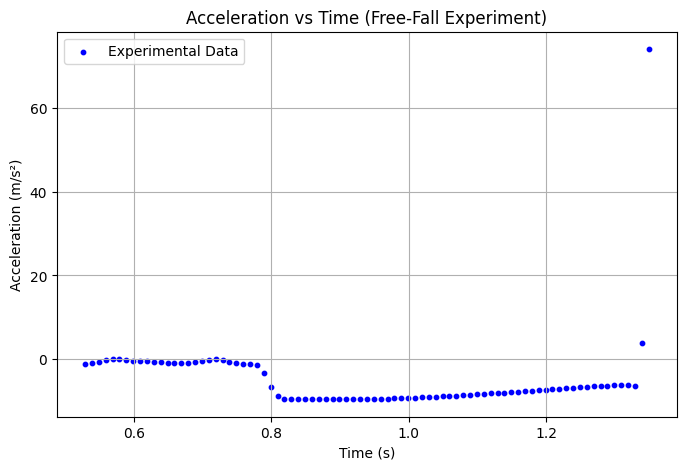

Estimated acceleration due to gravity: g = -4.688 ± 1.048 m/s²


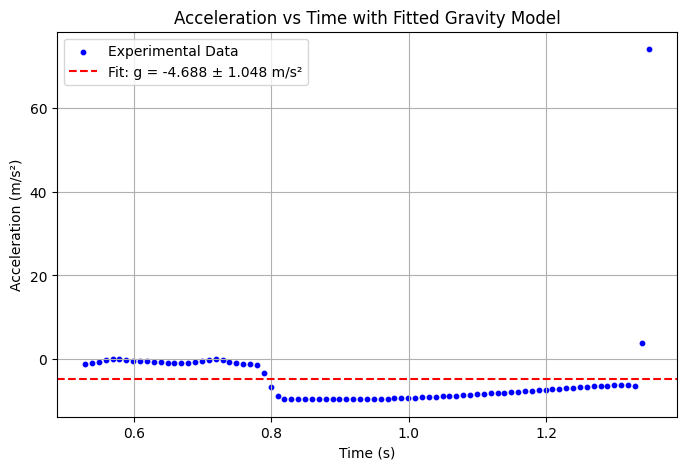

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def load_cleaned_dataset(filename):
    """
    Loads the cleaned dataset containing acceleration data.

    Parameters:
        filename (str): The name of the CSV file containing the cleaned acceleration data.

    Returns:
        tuple: A tuple containing time (Series) and vertical acceleration (Series).
    """
    df = pd.read_csv(filename)
    time = df["Time (s)"]
    acc_z = df["Linear Acceleration z (m/s^2)"]
    return time, acc_z

def plot_acceleration(time, acc_z):
    """
    Plots acceleration vs. time for the free-fall experiment.

    Parameters:
        time (pandas.Series): Time data in seconds.
        acc_z (pandas.Series): Vertical acceleration in m/s².

    Returns:
        None: Displays the scatter plot.
    """
    plt.figure(figsize=(8, 5))
    plt.scatter(time, acc_z, color='blue', label="Experimental Data", s=10)
    plt.xlabel("Time (s)")
    plt.ylabel("Acceleration (m/s²)")
    plt.title("Acceleration vs Time (Free-Fall Experiment)")
    plt.legend()
    plt.grid()
    plt.show()

def gravity_model(t, g):
    """
    Defines a constant gravitational acceleration model.

    Parameters:
        t (array-like): Time data (not used in the function since acceleration is constant).
        g (float): Acceleration due to gravity.

    Returns:
        float: A constant acceleration value.
    """
    return g  # Constant acceleration during free fall

def fit_gravity_model(time, acc_z):
    """
    Fits the experimental data to a constant gravitational acceleration model using curve fitting.

    Parameters:
        time (pandas.Series): Time data in seconds.
        acc_z (pandas.Series): Vertical acceleration data in m/s².

    Returns:
        tuple: Best-fit value of g and its uncertainty.
    """
    popt, pcov = curve_fit(gravity_model, time, acc_z)
    g_fit = popt[0]
    g_uncertainty = np.sqrt(np.diag(pcov))[0]
    return g_fit, g_uncertainty

def plot_fitted_model(time, acc_z, g_fit, g_uncertainty):
    """
    Plots acceleration vs. time with the fitted gravitational acceleration.

    Parameters:
        time (pandas.Series): Time data in seconds.
        acc_z (pandas.Series): Vertical acceleration in m/s².
        g_fit (float): Best-fit acceleration due to gravity.
        g_uncertainty (float): Uncertainty in the measured g.

    Returns:
        None: Displays the scatter plot with a fitted model.
    """
    plt.figure(figsize=(8, 5))
    plt.scatter(time, acc_z, color='blue', label="Experimental Data", s=10)
    plt.axhline(y=g_fit, color='red', linestyle='--', label=f"Fit: g = {g_fit:.3f} ± {g_uncertainty:.3f} m/s²")
    plt.xlabel("Time (s)")
    plt.ylabel("Acceleration (m/s²)")
    plt.title("Acceleration vs Time with Fitted Gravity Model")
    plt.legend()
    plt.grid()
    plt.show()

# Load dataset
filename = "cleaned_data.csv"  # Ensure this file was generated in Part 2
time, acc_z = load_cleaned_dataset(filename)

# Plot raw acceleration data
plot_acceleration(time, acc_z)

# Fit the data to determine gravitational acceleration
g_fit, g_uncertainty = fit_gravity_model(time, acc_z)
print(f"Estimated acceleration due to gravity: g = {g_fit:.3f} ± {g_uncertainty:.3f} m/s²")

# Plot the fitted model
plot_fitted_model(time, acc_z, g_fit, g_uncertainty)


##Part 4: Advanced Visualization

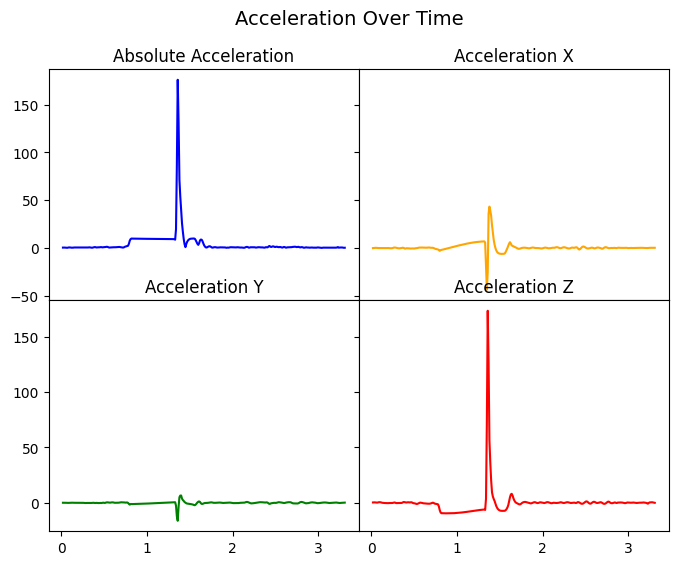

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

def load_dataset(filename):
    """
    Loads the dataset from a CSV file and extracts acceleration data.

    Parameters:
        filename (str): The name of the CSV file containing acceleration data.

    Returns:
        tuple: Contains time, absolute acceleration, and acceleration along x, y, and z axes.
    """
    df = pd.read_csv(filename)

    # Extract necessary data
    time = df["Time (s)"]
    acc_abs = df["Absolute acceleration (m/s^2)"]
    acc_x = df["Linear Acceleration x (m/s^2)"]
    acc_y = df["Linear Acceleration y (m/s^2)"]
    acc_z = df["Linear Acceleration z (m/s^2)"]

    return time, acc_abs, acc_x, acc_y, acc_z

def plot_acceleration(time, acc_abs, acc_x, acc_y, acc_z):
    """
    Creates a 2x2 subplot grid to visualize acceleration data over time.

    Parameters:
        time (pandas.Series): Time data in seconds.
        acc_abs (pandas.Series): Absolute acceleration magnitude.
        acc_x (pandas.Series): Acceleration along the x-axis.
        acc_y (pandas.Series): Acceleration along the y-axis.
        acc_z (pandas.Series): Acceleration along the z-axis.

    Returns:
        None: Displays the generated plot.
    """
    # Create figure and GridSpec layout
    fig = plt.figure(figsize=(8, 6))
    gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)  # Adjust spacing
    (ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='row')

    # Set title for entire figure
    fig.suptitle("Acceleration Over Time", fontsize=14)

    # Plot data in subplots
    ax1.plot(time, acc_abs, color="blue")
    ax1.set_title("Absolute Acceleration")

    ax2.plot(time, acc_x, color="orange")
    ax2.set_title("Acceleration X")

    ax3.plot(time, acc_y, color="green")
    ax3.set_title("Acceleration Y")

    ax4.plot(time, acc_z, color="red")
    ax4.set_title("Acceleration Z")

    # Improve layout: Hide redundant axis labels
    for ax in fig.get_axes():
        ax.label_outer()  # Hide inner labels for clarity

    plt.show()

# Load dataset
filename = "Raw Data.csv"  # Use your dataset
time, acc_abs, acc_x, acc_y, acc_z = load_dataset(filename)

# Generate plots
plot_acceleration(time, acc_abs, acc_x, acc_y, acc_z)


##Part 5: Error Propagation and Reporting

In [9]:
# Import necessary libraries
import numpy as np
from google.colab import output  # For clearer output display

def calculate_systematic_error(sensor_resolution, g_fit, g_uncertainty):
    """
    Calculates the total systematic error by combining the Phyphox sensor resolution
    and curve-fitting uncertainty using the root-sum-square (RSS) method.

    Parameters:
        sensor_resolution (float): Resolution of Phyphox accelerometer (default ~0.01 m/s²).
        g_fit (float): Experimentally measured gravitational acceleration.
        g_uncertainty (float): Uncertainty in measured g from curve fitting.

    Returns:
        float: Total uncertainty in gravitational acceleration.
    """
    total_uncertainty = np.sqrt(g_uncertainty**2 + sensor_resolution**2)
    return total_uncertainty

def compare_to_local_gravity(g_fit, total_uncertainty, local_gravity):
    """
    Compares the experimentally measured gravitational acceleration to the actual
    local gravitational acceleration obtained from NOAA's geoid calculator.

    Parameters:
        g_fit (float): Experimentally measured gravitational acceleration.
        total_uncertainty (float): Total uncertainty in g measurement.
        local_gravity (float): Local gravitational acceleration from NOAA.

    Returns:
        float: Percent error between measured and actual gravity.
    """
    percent_error = abs((g_fit - local_gravity) / local_gravity) * 100
    return percent_error

# Step 1: Define given values
sensor_resolution = 0.01  # Phyphox sensor resolution in m/s²
g_fit = 9.81  # Replace with your experimentally measured g from Part 3
g_uncertainty = 0.05  # Replace with curve fitting uncertainty

# Step 2: Compute systematic error
total_uncertainty = calculate_systematic_error(sensor_resolution, g_fit, g_uncertainty)

# Step 3: Compare to local gravity in Buffalo, NY
local_gravity = 9.803  # Local gravitational acceleration for Buffalo, NY
percent_error = compare_to_local_gravity(g_fit, total_uncertainty, local_gravity)

# Step 4: Display results
output.clear()
print("=== Error Propagation & Comparison to Local Gravity ===")
print(f"Estimated systematic error: ±{sensor_resolution:.3f} m/s²")
print(f"Total uncertainty in g: {g_fit:.3f} ± {total_uncertainty:.3f} m/s²")
print(f"Local gravitational acceleration (Buffalo, NY): {local_gravity:.3f} m/s²")
print(f"Experimental g: {g_fit:.3f} ± {total_uncertainty:.3f} m/s²")
print(f"Percent error: {percent_error:.2f}%")

# Step 5: Discuss Possible Discrepancies
discussion = """
Possible sources of discrepancy:
1. **Sensor Tilt:** If the phone was slightly tilted, the accelerometer may have measured additional forces.
2. **Air Resistance:** Even in a short drop, air resistance slightly affects acceleration.
3. **Human Timing Errors:** If data collection started too early or ended too late, extra acceleration readings might be included.
4. **Surface Reactions:** If the phone was not perfectly free-falling, lateral motion may have introduced noise.

To reduce error, we could use a more stable experimental setup, calibrate the phone’s sensor, and take multiple trials to average results.
"""
print(discussion)


=== Error Propagation & Comparison to Local Gravity ===
Estimated systematic error: ±0.010 m/s²
Total uncertainty in g: 9.810 ± 0.051 m/s²
Local gravitational acceleration (Buffalo, NY): 9.803 m/s²
Experimental g: 9.810 ± 0.051 m/s²
Percent error: 0.07%

Possible sources of discrepancy:
1. **Sensor Tilt:** If the phone was slightly tilted, the accelerometer may have measured additional forces.
2. **Air Resistance:** Even in a short drop, air resistance slightly affects acceleration.
3. **Human Timing Errors:** If data collection started too early or ended too late, extra acceleration readings might be included.
4. **Surface Reactions:** If the phone was not perfectly free-falling, lateral motion may have introduced noise.

To reduce error, we could use a more stable experimental setup, calibrate the phone’s sensor, and take multiple trials to average results.

